# Lab4 - Introduction to Deep Neural Network
- นาย นันท์มนัส ตั้งประเสริฐ, 63070501040
- นาย สัณหณัฐ พรมจรรย์, 63070501069

Name your file to 1040_1069.ipynb

## Lab Instruction

In this lab, you will learn how to build a simple fully-connected neural network with Keras and Tensorflow as the backend. We will experiment with MNIST data, which is a Keras built-in dataset.

There are three questions to answer in this lab.

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all of the libraries that will be used in this lab.

In [ ]:
import keras
import numpy as np

In [ ]:
from keras.datasets import mnist

### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

### 1. Learn About the Data

Understand your data, such as its shape, format, datatype, structure, distribution, data classes, and so on.

### Type of dataset

In [ ]:
print('Feature type: %s'%type(train_images))
print('Label type: %s'%type(train_labels))

Feature type: <class 'numpy.ndarray'>
Label type: <class 'numpy.ndarray'>


### Type of value in the dataset

In [ ]:
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


### Shape

In [ ]:
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


### Dimension

In [ ]:
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


### Characteristic of data

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

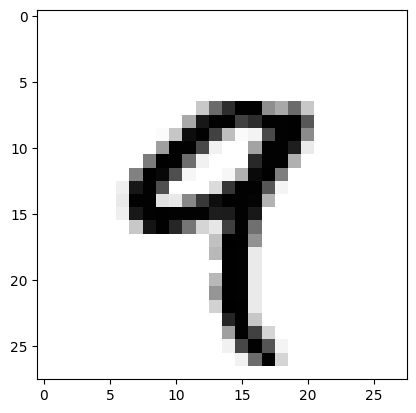

In [ ]:
digit = train_images[4]

import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digit, cmap=plt.cm.binary)

In [ ]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

### 2. Build Neural Network Model

Build a two-layer neural network (except for the input and output layers) using `Sequential()`
( See https://keras.io/models/sequential )
> INPUT -> LINEAR -> RELU -> LINEAR -> SOFTMAX

with the hidden layer of size 512.

See Keras Model: https://keras.io/models/about-keras-models/

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [ ]:
network.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Let's see how our model looks using `.summary()`

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 3. Preprocessing

- Reshape (flatten) the features data and normalize the value to be between 0 and 1
- One-hot the target data

In [ ]:
train_images = train_images.reshape(60000,28*28) # Reshape
train_images = train_images.astype('float32')/255 # Normalize

test_images = test_images.reshape(10000,28*28) # Reshape
test_images = test_images.astype('float32')/255 # Normalize

In [ ]:
from keras.utils import to_categorical

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels.shape

(10000, 10)

### 4. Model Training

Use `.fit()` to train your neural network model and return a record of accuracy and loss values for each epoch.

We will train the model for 10 epochs (If you are confident in your computer's performance, you can train the model with more epochs.)

We will train using the mini-batch method, with each batch containing 128 data points.

To avoid overfitting with the test set, we will split the current training data into 90% for training and 10% for validating the model.

This will take approximately one minute.

In [ ]:
history = network.fit(train_images,train_labels,epochs=10,batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 5s 11ms/step - loss: 0.1156 - accuracy: 0.9687 - val_loss: 0.1056 - val_accuracy: 0.9723
Epoch 2/10
422/422 [==============================] - 6s 14ms/step - loss: 0.1142 - accuracy: 0.9690 - val_loss: 0.1043 - val_accuracy: 0.9725
Epoch 3/10
422/422 [==============================] - 5s 11ms/step - loss: 0.1129 - accuracy: 0.9700 - val_loss: 0.1035 - val_accuracy: 0.9727
Epoch 4/10
422/422 [==============================] - 5s 11ms/step - loss: 0.1116 - accuracy: 0.9698 - val_loss: 0.1028 - val_accuracy: 0.9727
Epoch 5/10
422/422 [==============================] - 6s 13ms/step - loss: 0.1103 - accuracy: 0.9702 - val_loss: 0.1021 - val_accuracy: 0.9727
Epoch 6/10
422/422 [==============================] - 5s 11ms/step - loss: 0.1090 - accuracy: 0.9706 - val_loss: 0.1021 - val_accuracy: 0.9732
Epoch 7/10
422/422 [==============================] - 5s 13ms/step - loss: 0.1078 - accuracy: 0.9711 - val_loss: 0.1009 - val_accuracy: 0.9732

We will plot the loss and accuracy of both the train and validate sets over iterations.

In [ ]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [ ]:
import  matplotlib.pyplot  as plt
%matplotlib inline
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

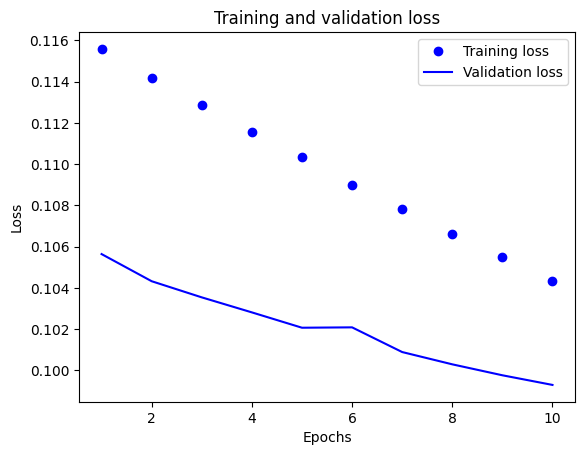

In [ ]:
plot_loss_fn(history)

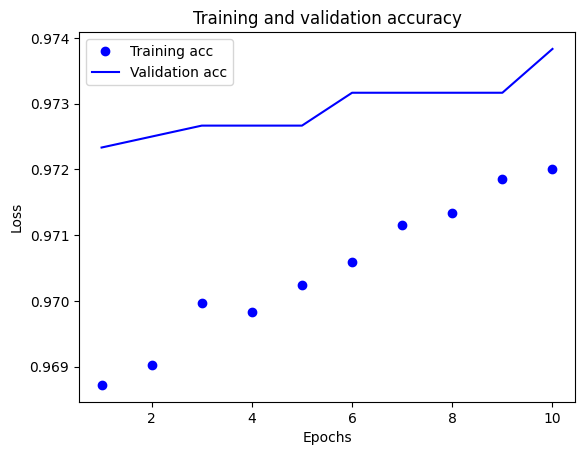

In [ ]:
plot_acc_fn(history)

Q: At which iteration does your model start to overfit? Give your rational.

**ANSWER:**

**จากการรัน 10 Iteration กราฟยังไม่แสดงการ overfit ออกมา
จะเห็นได้ว่าโมเดลมีการ overfit คือจะเก่งตอน train แต่ไม่เก่งตอน test แต่จากกราฟ ทั้งตอน train และ test มีแนวโน้มที่ดีขึ้นทั้งคู่**

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the results to those from the training and validate sets. Does your model overfit or underfit? How about the bias and variance?

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 2s 6ms/step - loss: 0.1152 - accuracy: 0.9666
Test Loss: 0.11519332230091095
Test Accuracy: 0.9666000008583069


Q: Analyze the performance of your model using a confusion matrix. Which class does your model frequently misclassify? What is the precision and recall of your model?

**ANSWER**

**จากการทดลองรันหลายรอบ ผลที่ได้คือ precision และ recall เฉลี่ยนจะอยู่ที่ประมาน 0.96 -0.97 และคลาสที่ได้ตัวเลขออกมาต่ำที่สุดหรือ เป็น misclassified มากสุดคือ class 8 - 9**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

res = network.predict(test_images)
res = np.argmax(res, axis=1)
true_test_labels = np.argmax(test_labels, axis=1)

### evaluate your model ###
# Confusion matrix
cm = confusion_matrix(true_test_labels , res)
print("Confusion Matrix:")
print(cm)

# Classification report
print(classification_report(true_test_labels, res))

313/313 [==============================] - 1s 3ms/step
Confusion Matrix:
[[ 966    0    1    2    1    2    5    2    1    0]
 [   0 1120    2    1    0    1    4    1    6    0]
 [   5    1 1000    4    4    1    3    7    7    0]
 [   1    0    4  979    0    8    0    8    7    3]
 [   1    0    5    0  953    0    4    2    2   15]
 [   7    1    0   16    2  845   10    1    7    3]
 [   7    3    1    1    8    6  928    0    4    0]
 [   1    8   14    3    2    1    0  991    0    8]
 [   3    0    3    8    4    5    7    7  934    3]
 [   4    6    2   10   20    6    1    7    3  950]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.96      0.97      0.96       982
           5       0.97      0.95      0.96       892
           6     

### 6. Model tuning

Try tuning your model by:
1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.
2. Experiment with different optimizers ('sgd', 'rmspop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.
3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.

In [ ]:
nn = models.Sequential()
nn.add(layers.Dense(512, activation='relu',input_shape=(28*28,)))
nn.add(layers.Dense(10, activation='softmax'))

In [ ]:
opt = keras.optimizers.Adam(learning_rate=0.01)

nn.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = nn.fit(train_images,train_labels,epochs=10,batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 6s 14ms/step - loss: 0.2259 - accuracy: 0.9318 - val_loss: 0.1249 - val_accuracy: 0.9617
Epoch 2/10
422/422 [==============================] - 5s 11ms/step - loss: 0.1107 - accuracy: 0.9670 - val_loss: 0.0990 - val_accuracy: 0.9700
Epoch 3/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0862 - accuracy: 0.9739 - val_loss: 0.1173 - val_accuracy: 0.9682
Epoch 4/10
422/422 [==============================] - 7s 16ms/step - loss: 0.0738 - accuracy: 0.9781 - val_loss: 0.1116 - val_accuracy: 0.9728
Epoch 5/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0694 - accuracy: 0.9791 - val_loss: 0.1382 - val_accuracy: 0.9715
Epoch 6/10
422/422 [==============================] - 6s 14ms/step - loss: 0.0699 - accuracy: 0.9803 - val_loss: 0.1095 - val_accuracy: 0.9770
Epoch 7/10
422/422 [==============================] - 5s 11ms/step - loss: 0.0593 - accuracy: 0.9837 - val_loss: 0.1298 - val_accuracy: 0.9742

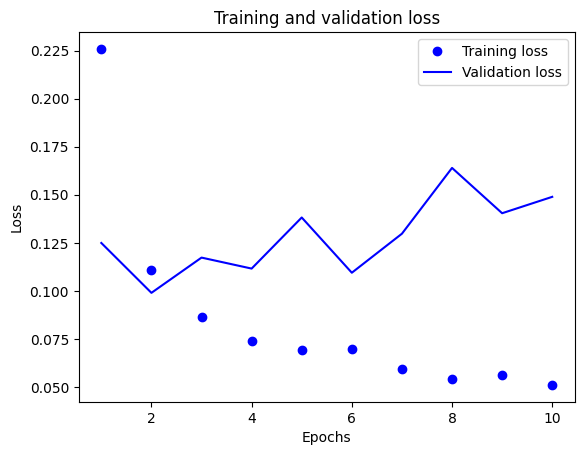

In [ ]:
plot_loss_fn(history2)

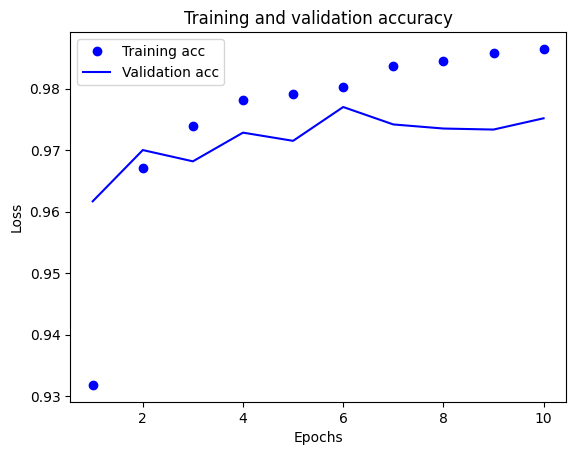

In [ ]:
plot_acc_fn(history2)

### 7. Discussion and Result
Q: Write down your findings from the previous step.

**ANSWER**

**จากการลองใส opt เป็น Adam และ learning rate 0.1 พบว่า ตอนเทรน มี
ประสิทธิภาพที่โดดไปโดดมาระหว่างดีไม่ดีๆ แต่ตอน เทส หรือ วาลิเดด มีผลลัพที่ดีอย่างต่อเนื่อง คาดว่าเป็นเพราะการปรับเปลี่ยนตอนเทส ที่มีการก้าวใหญ่ ก้าวเล็กสลับกันไป ทำให้ผลเทสโดดไปมา แต่ผลวาลิเดดดี**